# Decision Trees and Gradient Boosting

### Import the required libraries

In [46]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
from matplotlib import pyplot as plt

### Read the dataset

CONTEXT:
This is a dataset of electric vehicles.

It contains the following columns:


*   Brand
*   Model
*   AccelSec - Acceleration as 0-100 km/h
*   TopSpeed_KmH - The top speed in km/h
*   Range_Km - Range in km
*   Efficiency_WhKm - Efficiency Wh/km
*   FastCharge_KmH - Charge km/h
*   RapidCharge - Yes / No
*   PowerTrain - Front, rear, or all wheel drive
*   PlugType
*   BodyStyle - Basic size or style
*   Segment - Market segment
*   Seats - Number of seats
*   PriceEuro - Price in Germany before tax incentives




TASK:
Predict the target 'PriceEuro' and compare the performance of the DecisionTreeRegressor and the XGBRegressor models.

In [38]:
data = pd.read_csv("./data/ElectricCarData.csv")

In [39]:
data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [41]:
data['FastCharge_KmH'] = data['FastCharge_KmH'].replace("-", np.nan)
data['FastCharge_KmH'] = data['FastCharge_KmH'].astype(float)

In [42]:
data.isnull().sum() / len(data) * 100

Brand              0.000000
Model              0.000000
AccelSec           0.000000
TopSpeed_KmH       0.000000
Range_Km           0.000000
Efficiency_WhKm    0.000000
FastCharge_KmH     4.854369
RapidCharge        0.000000
PowerTrain         0.000000
PlugType           0.000000
BodyStyle          0.000000
Segment            0.000000
Seats              0.000000
PriceEuro          0.000000
dtype: float64

In [43]:
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(exclude=['object']).columns

In [44]:
categorical_cols

Index(['Brand', 'Model', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle',
       'Segment'],
      dtype='object')

In [45]:
numerical_cols

Index(['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm',
       'FastCharge_KmH', 'Seats', 'PriceEuro'],
      dtype='object')

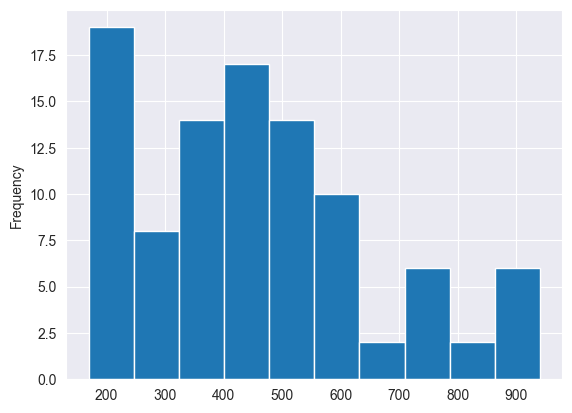

In [47]:
data['FastCharge_KmH'].plot.hist()
plt.show()

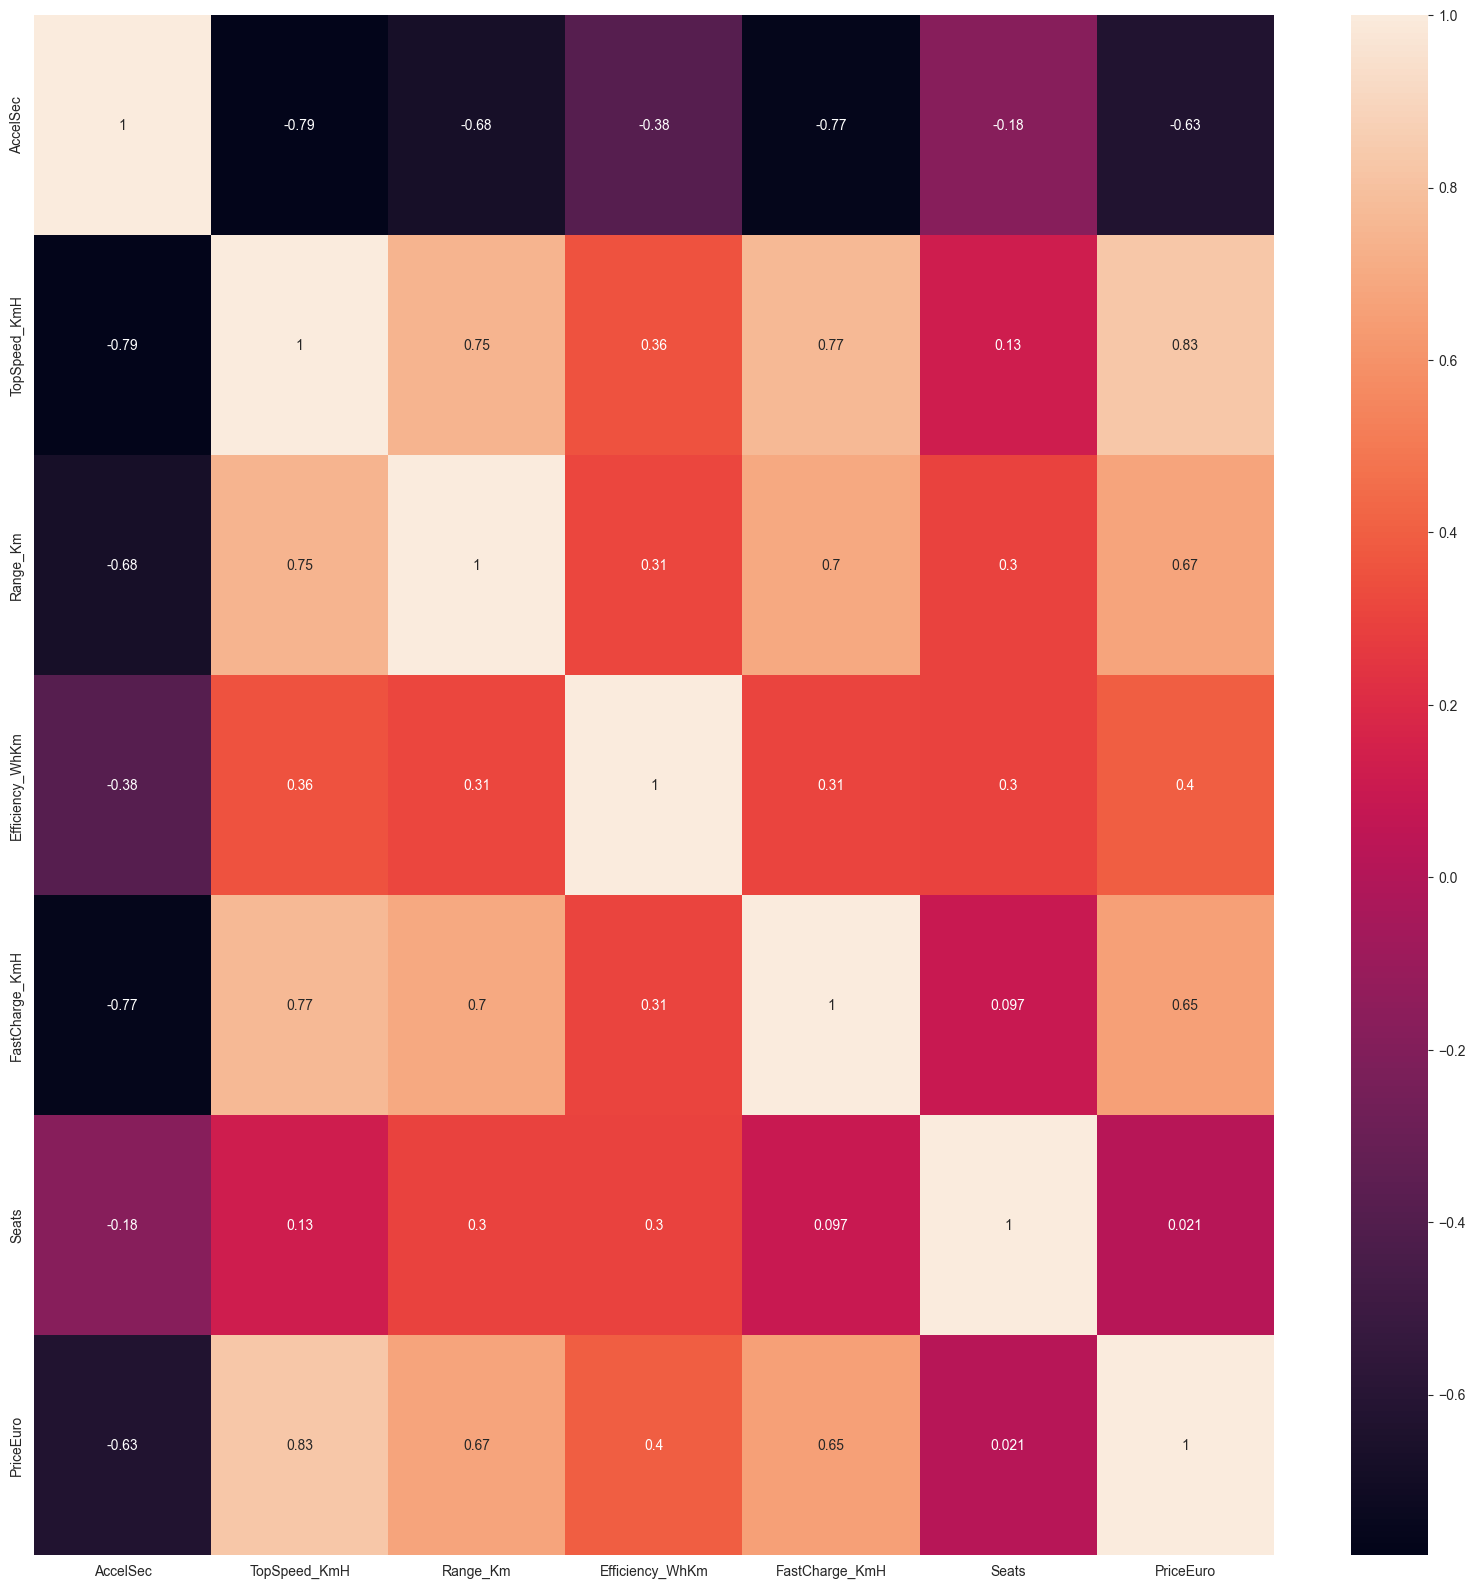

In [49]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(data[numerical_cols].corr(), annot=True)
plt.show()

In [52]:
from sklearn.impute import KNNImputer

In [53]:
imputer = KNNImputer(n_neighbors=5)
numerical_cols_imputed = imputer.fit_transform(data[numerical_cols])

In [56]:
data_numerical_imputed = pd.DataFrame(numerical_cols_imputed, columns=numerical_cols)

In [57]:
data = pd.concat([data_numerical_imputed, data[categorical_cols]], axis=1)

In [58]:
data

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,Brand,Model,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment
0,4.6,233.0,450.0,161.0,940.0,5.0,55480.0,Tesla,Model 3 Long Range Dual Motor,Yes,AWD,Type 2 CCS,Sedan,D
1,10.0,160.0,270.0,167.0,250.0,5.0,30000.0,Volkswagen,ID.3 Pure,Yes,RWD,Type 2 CCS,Hatchback,C
2,4.7,210.0,400.0,181.0,620.0,5.0,56440.0,Polestar,2,Yes,AWD,Type 2 CCS,Liftback,D
3,6.8,180.0,360.0,206.0,560.0,5.0,68040.0,BMW,iX3,Yes,RWD,Type 2 CCS,SUV,D
4,9.5,145.0,170.0,168.0,190.0,4.0,32997.0,Honda,e,Yes,RWD,Type 2 CCS,Hatchback,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160.0,330.0,191.0,440.0,5.0,45000.0,Nissan,Ariya 63kWh,Yes,FWD,Type 2 CCS,Hatchback,C
99,4.5,210.0,335.0,258.0,540.0,5.0,96050.0,Audi,e-tron S Sportback 55 quattro,Yes,AWD,Type 2 CCS,SUV,E
100,5.9,200.0,325.0,194.0,440.0,5.0,50000.0,Nissan,Ariya e-4ORCE 63kWh,Yes,AWD,Type 2 CCS,Hatchback,C
101,5.1,200.0,375.0,232.0,450.0,5.0,65000.0,Nissan,Ariya e-4ORCE 87kWh Performance,Yes,AWD,Type 2 CCS,Hatchback,C


### Encode string variables

In [59]:
from sklearn.preprocessing import OrdinalEncoder

In [60]:
data.RapidCharge.unique()

array(['Yes', 'No'], dtype=object)

In [61]:
columns = ["Brand", "Model", "PowerTrain", "PlugType", "BodyStyle", "Segment"]

In [62]:
encoder = OrdinalEncoder()
data[columns] = encoder.fit_transform(data[columns])

In [63]:
def encode_boolean(val):
    return 1 if val=="Yes" else 0

In [64]:
data["RapidCharge"] = data["RapidCharge"].apply(encode_boolean)

In [65]:
data

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,Brand,Model,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment
0,4.6,233.0,450.0,161.0,940.0,5.0,55480.0,30.0,46.0,1,0.0,2.0,7.0,3.0
1,10.0,160.0,270.0,167.0,250.0,5.0,30000.0,31.0,33.0,1,2.0,2.0,1.0,2.0
2,4.7,210.0,400.0,181.0,620.0,5.0,56440.0,23.0,0.0,1,0.0,2.0,2.0,3.0
3,6.8,180.0,360.0,206.0,560.0,5.0,68040.0,2.0,101.0,1,2.0,2.0,6.0,3.0
4,9.5,145.0,170.0,168.0,190.0,4.0,32997.0,9.0,78.0,1,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,7.5,160.0,330.0,191.0,440.0,5.0,45000.0,20.0,6.0,1,1.0,2.0,1.0,2.0
99,4.5,210.0,335.0,258.0,540.0,5.0,96050.0,1.0,94.0,1,0.0,2.0,6.0,4.0
100,5.9,200.0,325.0,194.0,440.0,5.0,50000.0,20.0,8.0,1,0.0,2.0,1.0,2.0
101,5.1,200.0,375.0,232.0,450.0,5.0,65000.0,20.0,10.0,1,0.0,2.0,1.0,2.0


## Split the dataset for training and testing in ratio 80:20

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = data.drop(["PriceEuro"], axis=1)
Y = data["PriceEuro"]

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Initialize the DecisionTreeRegressor model, and use the fit function for training the model.

Add values for the parameters max_depth, min_samples_split, and max_features.

Fit the model using the fit function


In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [129]:
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, max_features=15, random_state=0)

In [130]:
dt_model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=10, max_features=15, min_samples_split=5,
                      random_state=0)

## Predict the outcomes for X test

In [131]:
Y_pred = dt_model.predict(X_test)

## Assess the model performance, by using sklearn metrics for regression

In [132]:
r2_score(Y_test, Y_pred)

0.5002245935902994

In [175]:
mean_absolute_error(Y_test, Y_pred)

18433.36111111111

In [176]:
mean_squared_error(Y_test, Y_pred)

1271624985.2622354

## Initialize the XGBRegressor model, and use the fit function

Add values for the parameters: n_estimators, max_depth, learning_rate, and set the objective to "reg:squarederror"

In [134]:
from xgboost import XGBRegressor

Fit the model using the fit function

In [169]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, objective="reg:squarederror", random_state=0)

In [170]:
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

## Predict the outcomes for X test

In [171]:
Y_pred2 = xgb_model.predict(X_test)

## Assess the model performance, by using sklearn metrics for regression

In [172]:
r2_score(Y_test, Y_pred2)

0.5439055866567122

In [173]:
mean_squared_error(Y_test, Y_pred2)

1160483377.5481853

In [174]:
mean_absolute_error(Y_test, Y_pred2)

18822.83956473214

## Compare the performances of both model for at least three regression metircs